In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [13]:
beeps = pd.read_csv(beeps[0])

In [14]:
#beeps = beeps[(~beeps['ppsk'].isna()) & (beeps['ppsk'] != 'MISSING')]
beeps.drop('count', axis=1, inplace=True)
beeps['Month'] = beeps['Timestamp'].str.split('/',expand=True)[0]
beeps['Day'] = beeps['Timestamp'].str.split(" ", expand=True)[0].str.rsplit('/', n=1, expand=True)[0]
beeps['Year'] = beeps['Timestamp'].str.split(" ", expand=True)[0].str.rsplit('/', n=1, expand=True)[1]
beeps['Time'] = beeps['Timestamp'].str.split(" ", expand=True)[1]
beeps['Day'] = beeps['Day'].str.split('/',expand=True)[1]

#beeps['ppsk'] = beeps['ppsk'].astype(int)
beeps['Day'] = beeps['Day'].astype(int)
beeps['Year'] = beeps['Year'].astype(int)
beeps['Month'] = beeps['Month'].astype(int)
beeps = beeps.sort_values(by=['Year', 'Month', 'Day', 'Time'])

waivers = pd.read_csv(waivers[0])
bcdi = pd.read_csv(bcdi[0])
bcdi = bcdi[bcdi['ppsk'] != 'MISSING']
bcdi['ppsk'] = bcdi['ppsk'].astype(int)

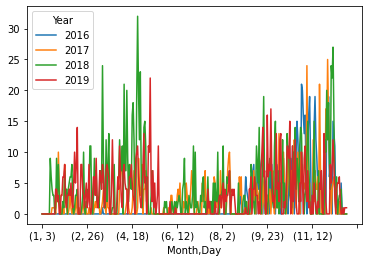

In [64]:
beeps.groupby(['Month','Day','Year']).count().unstack()['ppsk'].fillna(0).plot(kind='line')

In [16]:
test = beeps.loc[:]
test['Count'] = beeps.groupby('ppsk')['Month'].transform('size')

In [17]:
reduced_cost = waivers[(waivers['Full Waiver'] == 'Y') | (waivers['Partial Waiver'] == 'Y') | (waivers['Partial Exception'] == 'Y')]
reduced_cost = reduced_cost[reduced_cost['ppsk'] != 'MISSING']
reduced_cost['ppsk'] = reduced_cost['ppsk'].astype(int)

In [18]:
reduced_cost#.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').groupby('gender').count()

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception
0,1308174,2016,Spring,Y,N,N
1,2423156,2016,Spring,Y,N,N
2,2419498,2016,Spring,Y,N,N
3,1483359,2016,Spring,Y,N,N
4,2636938,2016,Spring,Y,N,N
...,...,...,...,...,...,...
2956,2723917,2020,Spring,N,Y,N
2957,2638757,2020,Spring,N,Y,N
2958,3151043,2020,Spring,N,Y,N
2959,3171508,2020,Spring,N,Y,N


In [19]:
#reduced_cost[(reduced_cost == 'Y').any(axis=1)]

In [20]:
student_majors.query('ppsk == 687168')

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units


In [21]:
#jacobs[(~jacobs['ppsk'].duplicated()) & (jacobs['year'] != 2020)].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left').merge(reduced_cost[['Full Waiver','Partial Waiver', 'Partial Exception','ppsk']], on='ppsk', how='left').fillna('Unknown').groupby(['year','term','ethnic.l1'],sort=False).count().unstack().fillna(0)['ppsk']

In [22]:
waivers

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception
0,1308174,2016,Spring,Y,N,N
1,2423156,2016,Spring,Y,N,N
2,2419498,2016,Spring,Y,N,N
3,1483359,2016,Spring,Y,N,N
4,2636938,2016,Spring,Y,N,N
...,...,...,...,...,...,...
2956,2723917,2020,Spring,N,Y,N
2957,2638757,2020,Spring,N,Y,N
2958,3151043,2020,Spring,N,Y,N
2959,3171508,2020,Spring,N,Y,N


In [23]:
waivers = waivers[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
parent_income = jacobs[jacobs['ppsk'].isin(stem_paths[~stem_paths['income.parent'].isna()]['ppsk'])].merge(stem_paths[['income.parent','ppsk']], on='ppsk')
parent_income = parent_income.merge(waivers[['ppsk','Full Waiver', 'Partial Waiver', 'Partial Exception']],on='ppsk',how='inner')

In [25]:
graphing = parent_income[~parent_income['ppsk'].duplicated()]
graphing.sort_values(by='income.parent', ascending=False)

,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,ppsk,Full Waiver,Partial Waiver,Partial Exception


In [26]:
graphing['Under 50,000'] = graphing['income.parent'].map(lambda x: x < 50000)
#graphing['50k to 100k'] = graphing['income.parent'].map(lambda x: x < 50000)

In [27]:
graphing

,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,ppsk,Full Waiver,Partial Waiver,Partial Exception,"Under 50,000"


In [28]:
under50000 = graphing[graphing['income.parent'] < 50000]
under50000

,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,ppsk,Full Waiver,Partial Waiver,Partial Exception,"Under 50,000"


In [29]:
under50000

,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,ppsk,Full Waiver,Partial Waiver,Partial Exception,"Under 50,000"


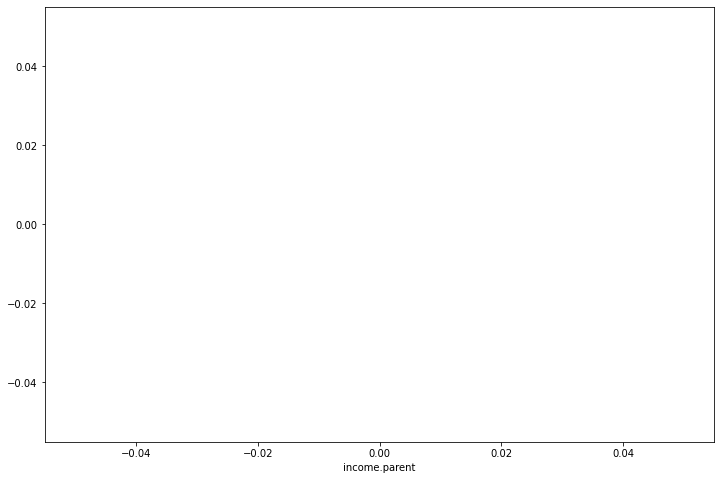

In [30]:
parent_income.sort_values(by='income.parent',ascending=False).groupby('income.parent').count()['ppsk'].plot(kind='line', figsize=(12,8))

In [31]:
stem_paths

,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,probation.year.1,GradYr,RetainY1,RetainY2,RetainY3,RetainY4,RetainY5,RetainY6,hs.gpa.unweighted,hs.gpa.weighted,sat.total,sat.math,sat.verbal,sat.writing,act.composite,act.english,act.writing,act.math,act.reading,act.science,first.generation.college.1,first.generation.college.2,hs.api,ceeb,income.parent,income.student,major.intended.college,major.intended.division,major.intended.department,esl,...,final.major.college.2,final.major.division.2,final.major.department.2,final.major.major.2,first.major.college.3,first.major.division.3,first.major.department.3,first.major.major.3,final.major.college.3,final.major.division.3,final.major.department.3,final.major.major.3,first.major.college.4,first.major.division.4,first.major.department.4,first.major.major.4,final.major.college.4,final.major.division.4,final.major.department.4,final.major.major.4,year.degree,term.degree,academic.year.degree,gpa.cum.degree,degree.college.1,degree.division.1,degree.department.1,degree.major.1,degree.college.2,degree.division.2,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4
0,1023906,1,2011,Fall,ADVANCED STANDING,Resident,Female,Underrepresented Minority,African American,African American/Black,N,3.0,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,26000.0,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,English+Other,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Spring,2013-14,3.871,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161295,1,2015,Fall,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,NaN,Y,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,90000.0,Clg of Environmental Design,Clg of Environmental Design,City & Regional Planning,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,183848,1,2010,Spring,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,U,NaN,4061,NaN,32000.0,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Art Practice,Art Practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.977,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232294,1,2009,Fall,ADVANCED STANDING,Resident,Female,White/Other,Other/Decline to State,Decline to State,N,2.5,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,39003.0,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Slavic Languages & Lit,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.939,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225526,1,2010,Fall,ADVANCED STANDING,Resident,Female,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,NaN,Clg of Environmental Design,Clg of Environmental Design,Architecture,English,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Architecture,Architecture,NaN,NaN,NaN,NaN,Na

In [32]:
jacobs

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders
0,724096,2015,Fall,Y,Y,Y
1,687168,2015,Fall,N,Y,Y
2,MISSING,2015,Fall,N,Y,N
3,781707,2015,Fall,N,N,Y
4,MISSING,2015,Fall,N,N,Y
...,...,...,...,...,...,...
16371,MISSING,2020,Fall,N,Y,N
16372,MISSING,2020,Fall,N,Y,N
16373,MISSING,2020,Fall,N,Y,N
16374,MISSING,2020,Fall,N,Y,N


In [33]:
waivers

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception
0,1308174,2016,Spring,Y,N,N
1,2423156,2016,Spring,Y,N,N
2,2419498,2016,Spring,Y,N,N
3,1483359,2016,Spring,Y,N,N
4,2636938,2016,Spring,Y,N,N
...,...,...,...,...,...,...
2956,2723917,2020,Spring,N,Y,N
2957,2638757,2020,Spring,N,Y,N
2958,3151043,2020,Spring,N,Y,N
2959,3171508,2020,Spring,N,Y,N


In [34]:
jacobs.merge(waivers[['ppsk','Full Waiver', 'Partial Waiver', 'Partial Exception']],on='ppsk',how='inner').drop_duplicates().merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').groupby(['year','term','ethnic.l1','Full Waiver', 'Partial Waiver']).count().unstack().fillna(0)['ppsk']

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent
0,781707,2015,Fall,N,N,Y,18000.0
1,781707,2016,Fall,N,N,Y,18000.0
2,857674,2015,Fall,N,N,Y,150000.0
3,856881,2015,Fall,N,Y,Y,180000.0
4,946962,2015,Fall,N,Y,Y,97436.0
...,...,...,...,...,...,...,...
7528,2734942,2020,Fall,N,N,Y,160000.0
7529,2736241,2020,Fall,N,Y,N,75000.0
7530,2738497,2020,Fall,N,Y,N,750000.0
7531,2743294,2020,Fall,N,Y,N,15000.0


In [38]:
stem_paths['hs.api'].value_counts()

10.0    12894
9.0      6071
8.0      3863
7.0      3177
6.0      2560
5.0      2145
3.0      1944
4.0      1827
2.0      1686
1.0      1158
Name: hs.api, dtype: int64

In [39]:
for f in stem_paths.columns:
    print(f)

ppsk
count
year
term
entry
residency
gender
ethnic.l1
ethnic.l2
ethnic.l3
probation.year.1
GradYr
RetainY1
RetainY2
RetainY3
RetainY4
RetainY5
RetainY6
hs.gpa.unweighted
hs.gpa.weighted
sat.total
sat.math
sat.verbal
sat.writing
act.composite
act.english
act.writing
act.math
act.reading
act.science
first.generation.college.1
first.generation.college.2
hs.api
ceeb
income.parent
income.student
major.intended.college
major.intended.division
major.intended.department
esl
gpa.first.term
units.completed.first.term
units.attempted.first.term
level.first.term
level.non.exam.first.term
year.last.gpa
term.last.gpa
gpa.cum.last
units.term.completed.last
units.term.attempted.last
level.last
level.non.exam.last
year.major.start
term.major.start
year.major.final
term.major.final
first.major.college.1
first.major.division.1
first.major.department.1
first.major.major.1
final.major.college.1
final.major.division.1
final.major.department.1
final.major.major.1
first.major.college.2
first.major.division.2


In [40]:
graphing = jacobs.merge(waivers[['ppsk','Full Waiver', 'Partial Waiver', 'Partial Exception']],on='ppsk',how='inner').drop_duplicates()
graphing

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [41]:
reduced_cost['year.name'] = (reduced_cost['year']).astype(str) + ' ' + reduced_cost['term']

In [42]:
reduced_cost


#.merge(student_courses, on=['ppsk','year.name'])

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception,year.name
0,1308174,2016,Spring,Y,N,N,2016 Spring
1,2423156,2016,Spring,Y,N,N,2016 Spring
2,2419498,2016,Spring,Y,N,N,2016 Spring
3,1483359,2016,Spring,Y,N,N,2016 Spring
4,2636938,2016,Spring,Y,N,N,2016 Spring
...,...,...,...,...,...,...,...
2956,2723917,2020,Spring,N,Y,N,2020 Spring
2957,2638757,2020,Spring,N,Y,N,2020 Spring
2958,3151043,2020,Spring,N,Y,N,2020 Spring
2959,3171508,2020,Spring,N,Y,N,2020 Spring


In [43]:
waivers[waivers['Full Waiver'] == 'Y']

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception
0,1308174,2016,Spring,Y,N,N
1,2423156,2016,Spring,Y,N,N
2,2419498,2016,Spring,Y,N,N
3,1483359,2016,Spring,Y,N,N
4,2636938,2016,Spring,Y,N,N
...,...,...,...,...,...,...
2940,3155760,2020,Spring,Y,N,N
2941,3162800,2020,Spring,Y,N,N
2942,2740035,2020,Spring,Y,N,N
2943,1032754,2020,Spring,Y,N,N


In [44]:
dnc_bcdi = student_courses[student_courses['ppsk'].isin(bcdi[bcdi['Did Not Complete Requirements'] == 'Y']['ppsk'])]




#.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left')

In [45]:
dnc_bcdi[dnc_bcdi['course.subject'] == 'Design Innovation']

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
136973,2016 Fall,2641443,Undergraduate,Engineering Science,Design Innovation,15,Primary,1,33435,33435.0,Design Methodology,Dennis Lieu; Helena Wang; Raunak Bhinge; Sara ...,A,Letter Grade,A-,3.7,3.0
309243,2016 Fall,2641443,Undergraduate,Engineering Science,Design Innovation,198,Primary,1,34443,34443.0,Directed Group Stud,Bjorn Hartmann,Credit,Non-Letter Grade,Pass,NaN,2.0
291373,2017 Spring,2638811,Undergraduate,Engineering Science,Design Innovation,198,Primary,2,33930,33930.0,Directed Group Stud,Bjorn Hartmann,Credit,Non-Letter Grade,Pass,NaN,2.0
329080,2017 Fall,2767761,Undergraduate,Engineering Science,Design Innovation,98,Primary,1,67162,67162.0,Directed Group Stud,Alice Agogino,Credit,Non-Letter Grade,Pass,NaN,2.0
61617,2018 Spring,2767761,Undergraduate,Design Innovation,Design Innovation,24,Primary,1,41731,41731.0,Ux Design,NaN,A,Letter Grade,A,4.0,3.0
5980,2019 Fall,2725920,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,NaN,B,Letter Grade,B,3.0,2.0
10136,2019 Fall,2731020,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,NaN,A,Letter Grade,A-,3.7,3.0
10137,2019 Fall,2731020,Undergraduate,Design Innovation,Design Innovation,190,Primary,1,15094,1721.0,Spec Topics Des Inv,NaN,A,Letter Grade,A,4.0,3.0


In [46]:
bcdi.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').merge(reduced_cost, on='ppsk',how='left')#.groupby(['Full Waiver','Partial Waiver','Partial Exception','Did Not Complete Requirements']).count().unstack()['ppsk']

,ppsk,Completed Requirements,Did Not Complete Requirements,Currently Pursuing,ethnic.l1,gender,year,term,Full Waiver,Partial Waiver,Partial Exception,year.name
0,1312478,Y,N,N,Asian/Pacific Islander,Female,2016.0,Fall,Y,N,N,2016 Fall
1,1312478,Y,N,N,Asian/Pacific Islander,Female,2017.0,Spring,Y,N,N,2017 Spring
2,1481454,Y,N,N,White/Other,Female,NaN,NaN,NaN,NaN,NaN,NaN
3,1473682,Y,N,N,White/Other,Male,NaN,NaN,NaN,NaN,NaN,NaN
4,2760999,Y,N,N,White/Other,Male,2017.0,Spring,Y,N,N,2017 Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
288,2741723,N,N,Y,Underrepresented Minority,Male,NaN,NaN,NaN,NaN,NaN,NaN
289,2741723,N,N,Y,Underrepresented Minority,Male,NaN,NaN,NaN,NaN,NaN,NaN
290,2729249,N,N,Y,White/Other,Decline to State,NaN,NaN,NaN,NaN,NaN,NaN
291,2724158,N,N,Y,Underrepresented Minority,Male,2019.0,Spring,Y,N,N,2019 Spring


In [47]:
'''test = test.groupby('ppsk').first()
top5 = test.sort_values(by='Count', ascending=False).head().index
jacobs_ethnicities[jacobs_ethnicities['ppsk'].isin(top5)]'''

"test = test.groupby('ppsk').first()\ntop5 = test.sort_values(by='Count', ascending=False).head().index\njacobs_ethnicities[jacobs_ethnicities['ppsk'].isin(top5)]"

In [48]:
jacobs_ethnicities

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity,gender
8,2015 Spring,1030081,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
10,2015 Spring,1031223,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
13,2015 Spring,1032550,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Male
14,2015 Spring,1032733,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Male
17,2015 Spring,1171276,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,2019 Fall,2739108,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A-,3.7,2.0,White/Other,Female
1873,2019 Fall,2739284,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A,4.0,2.0,White/Other,Female
1876,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other,Female
1877,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,190,Primary,1,15094,1721.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,3.0,White/Other,Female


In [49]:
jacobs = jacobs[jacobs['ppsk'] != 'MISSING']
jacobs['ppsk'] = jacobs['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
full_jacobs = jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left')

In [51]:
all_jacobs = student_courses[student_courses['ppsk'].isin(full_jacobs['ppsk'].unique())]
all_jacobs

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
3183,2007 Fall,724096,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,8553,8553.0,Intro To Finance,Jonathan Berk,A,Letter Grade,A+,4.0,4.0
3184,2007 Fall,724096,Undergraduate,Psychology,Psychology,141,Primary,1,74426,74426.0,Devel Dur Infancy,Joseph Campos,A,Letter Grade,A+,4.0,3.0
3185,2007 Fall,724096,Undergraduate,Psychology,Psychology,150,Primary,1,74453,74453.0,Personality Psych,Meg Jay,A,Letter Grade,A+,4.0,3.0
4065,2007 Fall,765357,Undergraduate,Integrative Biology,Integrative Biology,88,Primary,1,43020,43020.0,Leaders Bio Scholar,Alissa Myrick; Katherine Kim; Tyrone Hayes,A,Letter Grade,A+,4.0,1.0
8987,2007 Summer,713359,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,2019 Summer,4243726,Undergraduate,Business,Business Admin-Undergrad,196,Primary,003D,11941,11941.0,Spec Topics Bus Adm,NaN,A,Letter Grade,A,4.0,3.0
20479,2019 Summer,4252132,Undergraduate,College Writing Programs,College Writing Programs,5D,Primary,1,13487,13487.0,Engl Thru Literatur,NaN,A,Letter Grade,A+,4.0,3.0
20480,2019 Summer,4252132,Undergraduate,Philosophy,Philosophy,2,Primary,3,13864,13864.0,Ind Moral/Soc Just,NaN,A,Letter Grade,A,4.0,4.0
21324,2019 Summer,4262309,Undergraduate,Architecture,Environmental Design,9,Primary,101,13361,13361.0,Embarc Design,NaN,B,Letter Grade,B,3.0,1.0


In [52]:
jacobs_majors = student_majors[student_majors['ppsk'].isin(full_jacobs['ppsk'].unique())]
jacobs_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
39907,596870,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,History,History,5.4
39906,596870,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Economics,Economics,5.4
60167,642664,U,2007 Fall,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,15.9
65340,651007,U,2007 Fall,1,Clg of Letters & Science,L&S Arts & Humanities Division,Music,Music,29.3
63963,648550,U,2007 Fall,1,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,29.3
...,...,...,...,...,...,...,...,...,...
21447,3187739,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,NaN
21448,3187739,U,2020 Spring,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Physics,Physics,NaN
21454,3187772,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21429,3187647,U,2020 Spring,1,Haas School of Business,Haas School of Business,Business,Business Administration,NaN


In [53]:
beeps['ppsk'].unique()

array([nan, '1171276', '2642796', '2639782', '1029375', '2426436',
       '2515527', '1481324', '2632278', '1473384', '2757974', '2757766',
       '842711', '1478479', '2633181', '1472820', '1474888', '1478830',
       '2630450', '2741213', '1478592', '2423189', 'MISSING', '2640063',
       '2425453', '2632112', '2761110', '2632164', '2635490', '2428434',
       '2422732', '1482846', '2725328'], dtype=object)

In [54]:
all_jacobs.groupby('ppsk')

In [55]:
cleaned_jacobs = full_jacobs[~full_jacobs.isnull().any(axis=1)]

In [56]:
cleaned_jacobs

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,gender
2,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
3,895798,2015,Fall,N,N,Y,White/Other,Male
4,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
5,856881,2015,Fall,N,Y,Y,International,Male
6,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
13127,2748534,2020,Fall,N,Y,N,International,Male
13128,2757639,2020,Fall,N,Y,N,International,Male
13129,2760042,2020,Fall,N,Y,N,White/Other,Male
13130,2766212,2020,Fall,N,Y,N,White/Other,Male


In [57]:
cleaned_jacobs['ethnic.l1'].value_counts()

Asian/Pacific Islander       4483
White/Other                  2501
International                1098
Underrepresented Minority     941
Name: ethnic.l1, dtype: int64

In [58]:
proportions_class = jacobs_ethnicities[jacobs_ethnicities['Ethnicity'] != 'Unknown']
proportions_class = proportions_class.groupby(['year.name','course.number','Ethnicity'],sort=False).count().unstack()['ppsk'].fillna(0)

In [59]:
proportions_class.sum(axis=1)

year.name    course.number
2015 Spring  190               48.0
2015 Fall    90                66.0
2016 Spring  190               55.0
             90               103.0
2016 Fall    190               37.0
             22                32.0
             10                43.0
             21                28.0
             15                61.0
             198              142.0
2017 Spring  190               30.0
             22                28.0
             21                27.0
             15                31.0
             198              151.0
             98                72.0
2017 Summer  190               10.0
             22                23.0
             190E               7.0
2017 Fall    190               26.0
             22                24.0
             10                53.0
             21                31.0
             15                24.0
             198              100.0
             98                59.0
             199                6.0
2

In [60]:
proportions_class['Underrepresented Minority']

year.name    course.number
2015 Spring  190               3.0
2015 Fall    90                6.0
2016 Spring  190              11.0
             90               10.0
2016 Fall    190               3.0
             22                0.0
             10                4.0
             21                1.0
             15                0.0
             198              11.0
2017 Spring  190               3.0
             22                6.0
             21                3.0
             15                0.0
             198              15.0
             98                3.0
2017 Summer  190               1.0
             22                2.0
             190E              1.0
2017 Fall    190               0.0
             22                3.0
             10                4.0
             21                4.0
             15                0.0
             198               7.0
             98                6.0
             199               0.0
2018 Spring  190            

In [61]:
# ask Andrew why there would be duplicated students in Jacob's data
#maker_passes[maker_passes.duplicated(subset='ppsk',keep='first')].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner')[['ppsk','ethnic.l1','gender']].groupby(['ethnic.l1', 'gender']).count().unstack()['ppsk'].plot(kind='bar')

In [62]:
# ppsks of everyone who (in data) uses Jacobs for something
ppsks = full_jacobs['ppsk']
ppsks = ppsks.append(jacobs_ethnicities['ppsk']).unique()

# all Jacobs students' academic career, either with DESINV course or MakerPass
all_jacobs = student_courses[student_courses['ppsk'].isin(ppsks)]

In [63]:
#get ppsks of students from jacobs and find other classes they take
# how many units students take
#all_jacobs = student_courses
all_jacobs

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
3183,2007 Fall,724096,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,8553,8553.0,Intro To Finance,Jonathan Berk,A,Letter Grade,A+,4.0,4.0
3184,2007 Fall,724096,Undergraduate,Psychology,Psychology,141,Primary,1,74426,74426.0,Devel Dur Infancy,Joseph Campos,A,Letter Grade,A+,4.0,3.0
3185,2007 Fall,724096,Undergraduate,Psychology,Psychology,150,Primary,1,74453,74453.0,Personality Psych,Meg Jay,A,Letter Grade,A+,4.0,3.0
4065,2007 Fall,765357,Undergraduate,Integrative Biology,Integrative Biology,88,Primary,1,43020,43020.0,Leaders Bio Scholar,Alissa Myrick; Katherine Kim; Tyrone Hayes,A,Letter Grade,A+,4.0,1.0
8987,2007 Summer,713359,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22126,2019 Summer,4264306,Undergraduate,Electrical Eng & Computer Sci,Computer Science,C8,Primary,1,14720,25.0,Foundation Data Sci,NaN,A,Letter Grade,A,4.0,4.0
22531,2019 Summer,4265730,Undergraduate,Electrical Eng & Computer Sci,Computer Science,61A,Primary,1,14622,14622.0,Str Interp Cmp Prgs,NaN,A,Letter Grade,A,4.0,4.0
22572,2019 Summer,4265873,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,NaN,B,Letter Grade,B,3.0,2.0
22573,2019 Summer,4265873,Undergraduate,Gender & Womens Studies,Gender & Womens Studies,111,Primary,2,14306,14306.0,Special Topics,NaN,A,Letter Grade,A,4.0,4.0
